In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from data_analysis.helpers import *

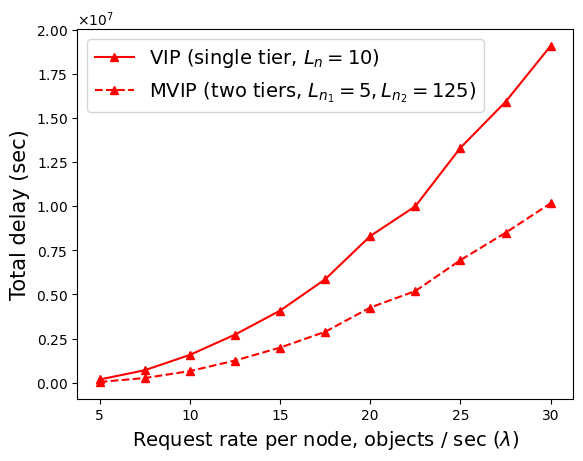

In [119]:
topology = "geant"

experiment_name_a = "some"
config_path_a = "../sim_configs/" + experiment_name_a + "_config.json"
test_config_a = getTestConfig(config_path_a)
db_path_a = "../sim_outputs/" + experiment_name_a + "_" + topology + "_db.json"
db_a = getJsonDb(db_path_a)

experiment_name_b = "some_mt"
config_path_b = "../sim_configs/" + experiment_name_b + "_config.json"
test_config_b = getTestConfig(config_path_b)
db_path_b = "../sim_outputs/" + experiment_name_b + "_" + topology + "_db.json"
db_b = getJsonDb(db_path_b)

num_objects = [1000]
source_read_rate = [1000]
stop_time = [100]
request_rate = 20
request_dist_param = 0.75
request_dist_type = "zipf"
pen_weight = 0
vip_inc = 0
vip_slot_len = 1
vip_win_size = 100

case_filters = [
    #("request_dist_param", request_dist_param, None),
    #("request_rate", request_rate, None),
]

param_list_a = simConfigToParamSets(test_config_a)
param_list_a = filterParamList(param_list_a, case_filters)
param_list_b = simConfigToParamSets(test_config_b)
param_list_b = filterParamList(param_list_b, case_filters)
metric="delay"

#x_data = [0, 1, 2, 3, 4, 5]
x_data = [5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30]
fig, ax = plt.subplots()
if False:
    fwd_pol = "vip"
    cache_pol = "lfu"
    is_vip = False

    if is_vip:
        filters = [
            ("fwd_pol", fwd_pol, None),
        ]
    else:
        filters = [
            ("cache_pol", cache_pol, None),
        ]
        match cache_pol:
            case "lru":
                style="-gx"
            case "lfu":
                style="-ks"
            case "fifo":
                style="-md"
            case "unif":
                style="-yo"

    new_param_list_a = filterParamList(param_list_a, filters)
    res = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db_a,
        new_param_list_a,
        test_config_a["source_map_seed"],
        test_config_a["request_generator_seed"],
        metric,
    )
    if is_vip:
        ax.plot(x_data, res, "-r^", label=fwd_pol.upper() + " (single tier)")
    else:
        ax.plot(x_data, res, style, label=cache_pol.upper() + " (single tier)")
    new_param_list_b = filterParamList(param_list_b, filters)
    res = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db_b,
        new_param_list_b,
        test_config_b["source_map_seed"],
        test_config_b["request_generator_seed"],
        metric,
    )
    if is_vip:
        ax.plot(x_data, res, "--r^", label="M"+fwd_pol.upper() + " (two tiers)")
    else:
        ax.plot(x_data, res, "-"+style, label="M"+cache_pol.upper() + " (two tiers)")

if False:
    fwd_pol = "vip"
    cache_pol = "lru"
    is_vip = False

    if is_vip:
        filters = [
            ("fwd_pol", fwd_pol, None),
        ]
    else:
        filters = [
            ("cache_pol", cache_pol, None),
        ]
        match cache_pol:
            case "lru":
                style="-gx"
            case "lfu":
                style="-ks"
            case "fifo":
                style="-md"
            case "unif":
                style="-yo"

    new_param_list_a = filterParamList(param_list_a, filters)
    res = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db_a,
        new_param_list_a,
        test_config_a["source_map_seed"],
        test_config_a["request_generator_seed"],
        metric,
    )
    if is_vip:
        ax.plot(x_data, res, "-r^", label=fwd_pol.upper() + " (single tier)")
    else:
        ax.plot(x_data, res, style, label=cache_pol.upper() + " (single tier)")
    new_param_list_b = filterParamList(param_list_b, filters)
    res = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db_b,
        new_param_list_b,
        test_config_b["source_map_seed"],
        test_config_b["request_generator_seed"],
        metric,
    )
    if is_vip:
        ax.plot(x_data, res, "--r^", label="M"+fwd_pol.upper() + " (two tiers)")
    else:
        ax.plot(x_data, res, "-"+style, label="M"+cache_pol.upper() + " (two tiers)")

if True:
    fwd_pol = "vip"
    cache_pol = "lfu"
    is_vip = True

    if is_vip:
        filters = [
            ("fwd_pol", fwd_pol, None),
        ]
    else:
        filters = [
            ("cache_pol", cache_pol, None),
        ]
        match cache_pol:
            case "lru":
                style="-gx"
            case "lfu":
                style="-ks"
            case "fifo":
                style="-md"
            case "unif":
                style="-yo"

    new_param_list_a = filterParamList(param_list_a, filters)
    res = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db_a,
        new_param_list_a,
        test_config_a["source_map_seed"],
        test_config_a["request_generator_seed"],
        metric,
    )
    if is_vip:
        ax.plot(x_data, res, "-r^", label=fwd_pol.upper() + " (single tier)")
    else:
        ax.plot(x_data, res, style, label=cache_pol.upper() + " (single tier)")
    new_param_list_b = filterParamList(param_list_b, filters)
    res = getDataFieldSumAvgsAcrossSeeds(
        topology,
        db_b,
        new_param_list_b,
        test_config_b["source_map_seed"],
        test_config_b["request_generator_seed"],
        metric,
    )
    if is_vip:
        ax.plot(x_data, res, "--r^", label="M"+fwd_pol.upper() + " (two tiers)")
    else:
        ax.plot(x_data, res, "-"+style, label="M"+cache_pol.upper() + " (two tiers)")

ax.legend(["VIP (single tier, $L_n=10$)", "MVIP (two tiers, $L_{n_1}=5, L_{n_2}=125$)"],fontsize=14)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
ax.set_ylabel("Total delay (sec)",fontsize=15)
#ax.set_xlabel("Added capacity ($\Delta L$)",fontsize=14)
ax.set_xlabel("Request rate per node, objects / sec ($\lambda$)",fontsize=14)
#fig_name = "_".join(tuple(map(str,(topology,request_rate,request_dist_param,metric))))
fig_name = "_".join(tuple(map(str,(topology,request_dist_param,metric))))
fig_path = "../sim_outputs/vip_vs_" + fig_name + ".pdf"
#print(fig_path)
fig.savefig(fig_path)
plt.show()